# Life Expectancy vs GDP

# 1) SetUp

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("/Users/drewpeterson/Documents/Programming/Python/CodeCademy/Life-Expectancy-and-GDP-Starter/all_data.csv")

In [8]:
df.rename(columns = {"Life expectancy at birth (years)":"life_exp", "Country":"country", "Year":"year", "GDP":"gdp"}, inplace=True)

In [9]:
df.head(3)

,country,year,life_exp,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10


# 2) Exploration

In [10]:
# Dtypes look correct, No Nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   96 non-null     object 
 1   year      96 non-null     int64  
 2   life_exp  96 non-null     float64
 3   gdp       96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [11]:
# Categorical Exploration: 6 countries, each with 16 observations
df.country.value_counts()

country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: count, dtype: int64

In [12]:
# Numerical Exploration: 
    # Year: 2000-2015 inclusive (16 years)
    # Life Expectancy: Median 77, Mean 73, outliers skewing data on lower end
    # GDP: difference on order of 10^4
df.describe()

,year,life_exp,gdp
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [13]:
# In the 75% percentile and above of GDP, only USA and China are present
    # China became present midway through the data collection (2008)
    # USA has the highest GDP throughout the observations
    # China demonstrates signs of exponential growth in early years
    # From first looks, it appears that life expectancy increases slightly with increase in GDP
df[df.gdp > np.percentile(df.gdp, 75)]

,country,year,life_exp,gdp
24,China,2008,74.5,4.598210e+12
25,China,2009,74.9,5.109950e+12
26,China,2010,75.0,6.100620e+12
27,China,2011,75.2,7.572550e+12
28,China,2012,75.4,8.560550e+12
29,China,2013,75.6,9.607220e+12
30,China,2014,75.8,1.048240e+13
31,China,2015,76.1,1.106470e+13
64,United States of America,2000,76.8,1.030000e+13
65,United States of America,2001,76.9,1.060000e+13


In [14]:
# Group By Country
    # USA has highest Average GDP, Zimbabwe lowest
    # Germany has highest Average Life Expectancy, Zimbabwe lowest

df.groupby("country").mean()

,year,life_exp,gdp
country,,,
Chile,2007.5,78.94375,1.697888e+11
China,2007.5,74.26250,4.957714e+12
Germany,2007.5,79.65625,3.094776e+12
Mexico,2007.5,75.71875,9.766506e+11
United States of America,2007.5,78.06250,1.407500e+13
Zimbabwe,2007.5,50.09375,9.062580e+09


In [15]:
# Across the Entire DataSet, GDP and Life Expectancy have a weak positiive linear correlation
df.corr(numeric_only=True)

,year,life_exp,gdp
year,1.000000,0.155050,0.208288
life_exp,0.155050,1.000000,0.343207
gdp,0.208288,0.343207,1.000000


# 3) Visualization

## Univariate Visualization

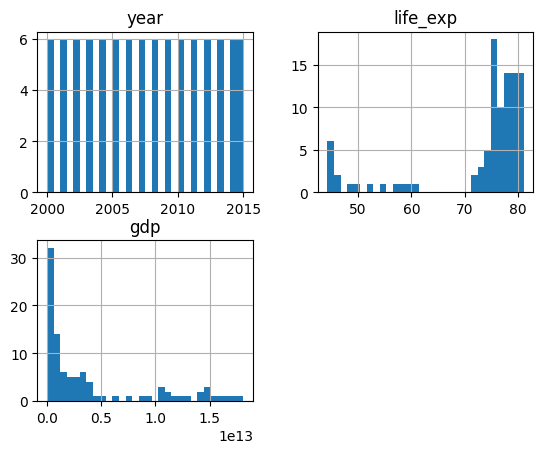

In [16]:
# Visualize Numerical, GDP and Life Expectancy have skew
df.hist(bins=30);

## Bivariate Visualization

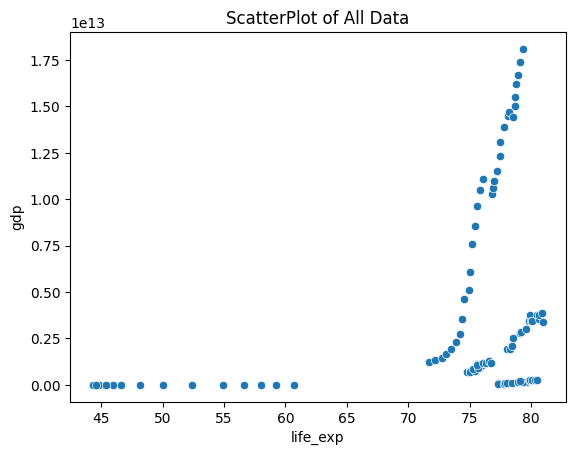

In [17]:
# ScatterPlot of All Data
sns.scatterplot(x= "life_exp", y="gdp", data=df);
plt.title("ScatterPlot of All Data");

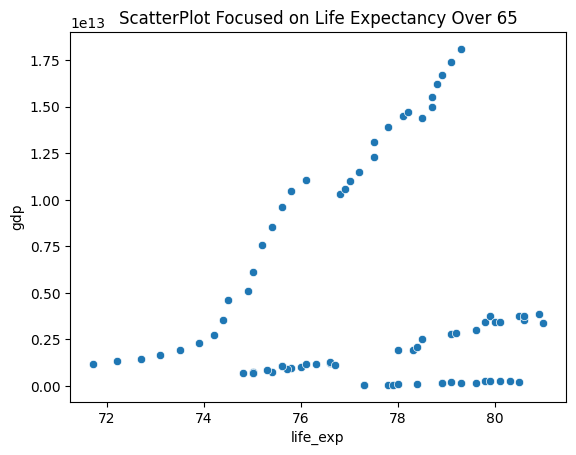

In [19]:
# ScatterPlot where Life Expectancy is Over 65
sns.scatterplot(x= "life_exp", y="gdp", data=df[df.life_exp>65]);
plt.title("ScatterPlot Focused on Life Expectancy Over 65");

Text(0.5, 1.0, 'GDP Change in Each Country')

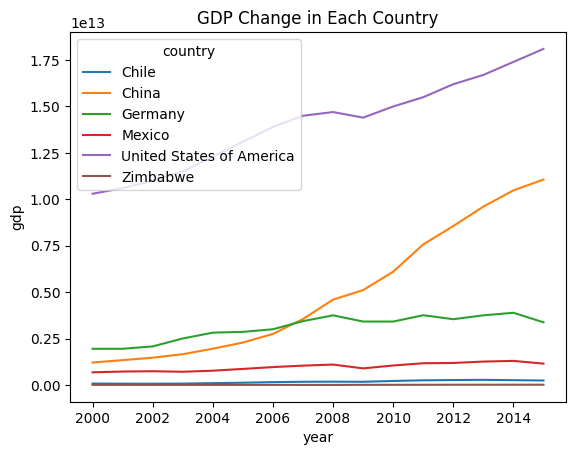

In [20]:
# Line Plot Showing the GDP Change Over time
    # USA has highest GDP, China's GDP is increasing
    # Zimbabwe and Chile have roughly similar GDP, yet Zimbabwe has lower life expectancy
sns.lineplot(x= "year", y="gdp", data=df, hue="country");
plt.title("GDP Change in Each Country")

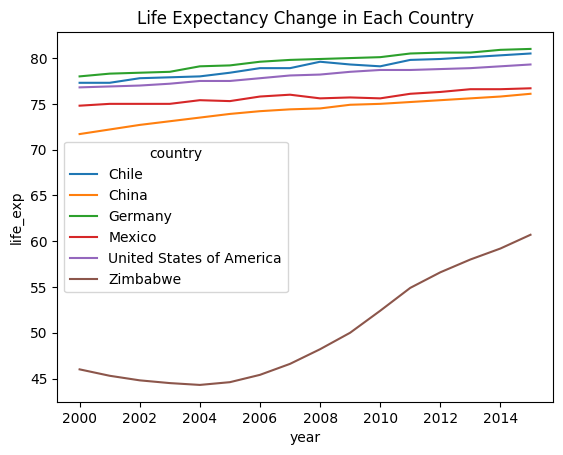

In [299]:
# Line Plot Showing the Life Expectancy Change Over time
    # Germany had the highest life expectancy (Germany also has the highest GDP Per Capita)
    # Zimbabwe's Life Expectancy is increasing signficantly
    # Other countries experienced a slight upward trend in Life Expectancy
sns.lineplot(x= "year", y="life_exp", data=df, hue="country");
plt.title("Life Expectancy Change in Each Country");

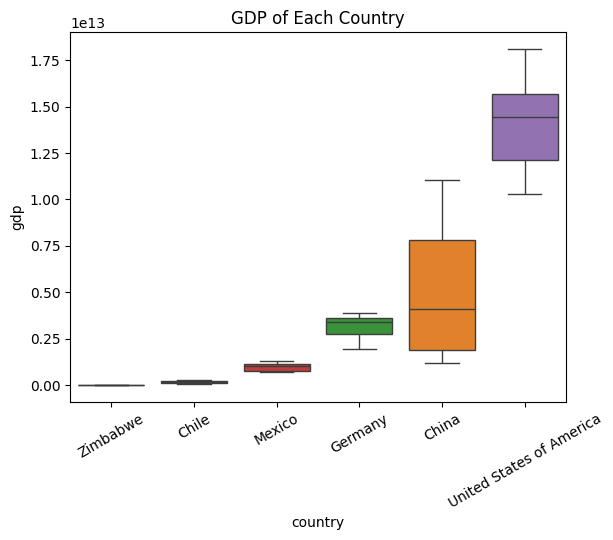

In [21]:
# Side-by-Side BoxPlot
    # 
sns.boxplot(x = "country", y = "gdp", data = df, order=df.groupby("country").gdp.max().reset_index().sort_values(by="gdp").country, hue="country");
plt.xticks(rotation=30);
plt.title("GDP of Each Country");

## Multi-Variate Visualization

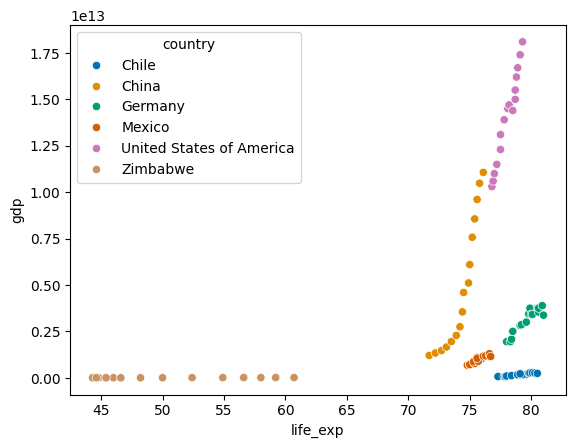

In [215]:
# Coloring by Country 
    # China started with a lower GDP than Germany, but finished with over twice as much as Germany
sns.scatterplot(x="life_exp", y="gdp", hue="country", data=df, palette="colorblind");

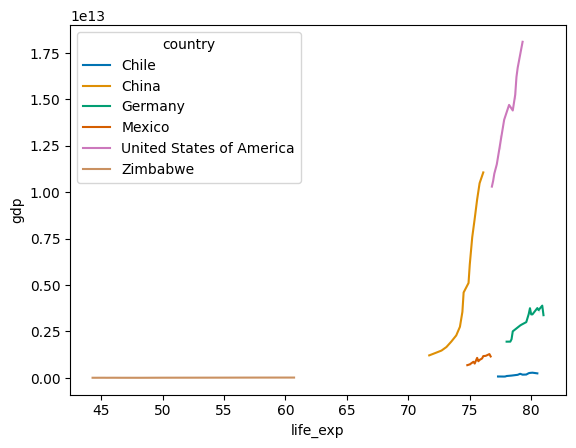

In [220]:
# Similar Visualization, but using a Line Graph
sns.lineplot(x="life_exp", y="gdp", hue="country", data=df, palette="colorblind");

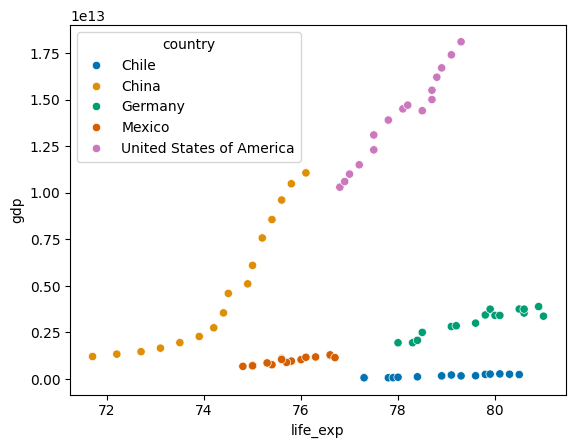

In [22]:
# ScatterPlot where Life Expectancy is Over 65
    # Germany and Chile have high Life Expectancy, while comparatively lower GDP
    # NOTE: Perhaps this is observation due to the GDP per capita
    # NOTE: Perhaps Germany has smaller absoluted GDP because it is a smaller country

sns.scatterplot(x= "life_exp", y="gdp", data=df[df.life_exp>65], hue="country", palette="colorblind");

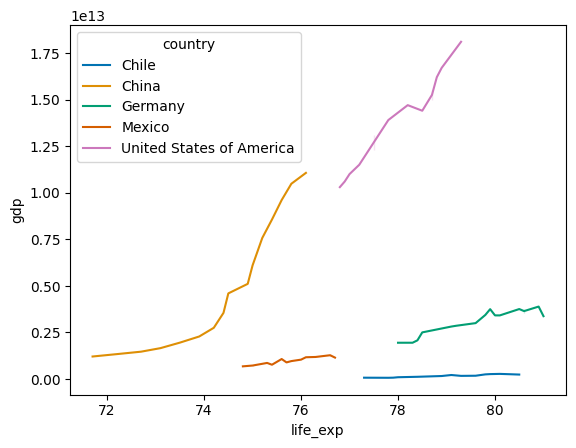

In [221]:
# ScatterPlot where Life Expectancy is Over 65 (Only Zimbabwe is not present)
sns.lineplot(x= "life_exp", y="gdp", data=df[df.life_exp>65], hue="country", palette="colorblind");

In [23]:
# Exploring Correlation Between GDP and Life Expectancy for Each Country
print(f"Correlation Between GDP and Life Expectancy:")
for each_country in df.country.value_counts().index:
    print(f"{each_country}: {round(df[df.country == each_country].gdp.corr(df[df.country == each_country].life_exp),2)}")

Correlation Between GDP and Life Expectancy:
Chile: 0.95
China: 0.91
Germany: 0.93
Mexico: 0.93
United States of America: 0.98
Zimbabwe: 0.97


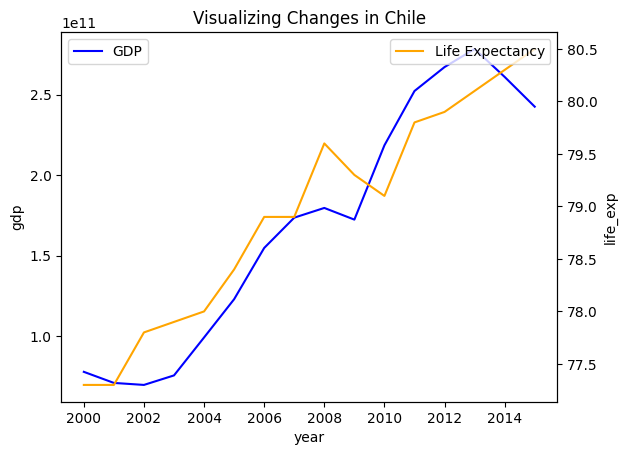

<Figure size 640x480 with 0 Axes>

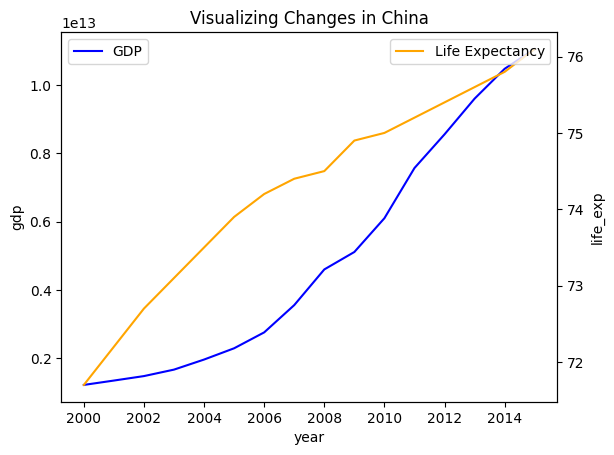

<Figure size 640x480 with 0 Axes>

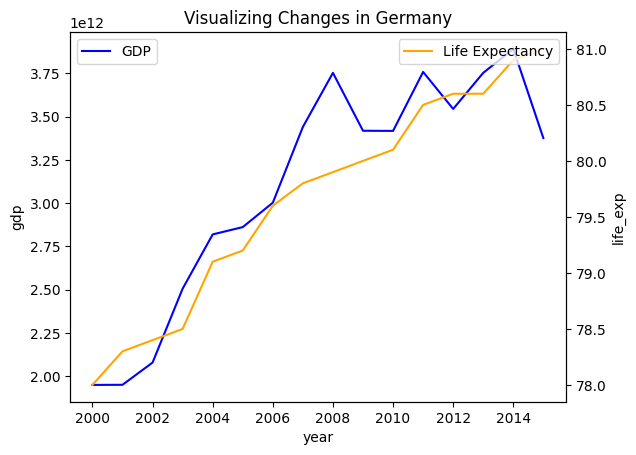

<Figure size 640x480 with 0 Axes>

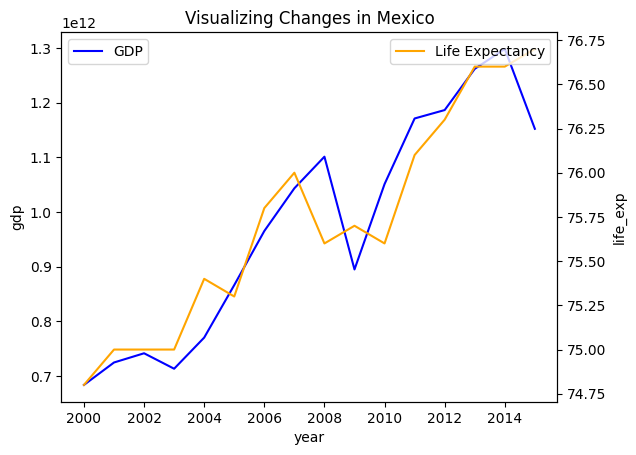

<Figure size 640x480 with 0 Axes>

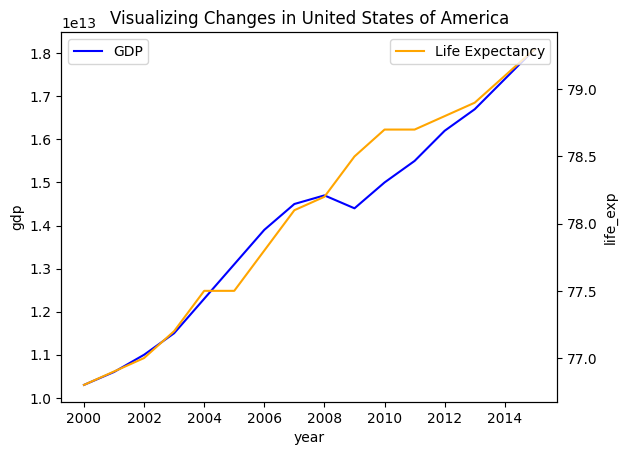

<Figure size 640x480 with 0 Axes>

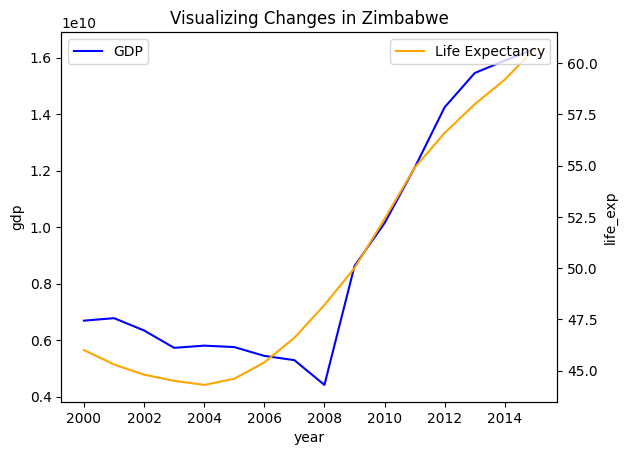

<Figure size 640x480 with 0 Axes>

In [24]:
# Graphing Relative Changes in GDP and Life Expectancy for Each Country

for each_country in df.country.unique():
    fig, ax1 = plt.subplots();
    sns.lineplot(x= "year", y="gdp", data=df[df.country==each_country], color="blue");
    ax1.legend(["GDP"], loc=0);

    ax2 = ax1.twinx();
    sns.lineplot(x= "year", y="life_exp", data=df[df.country==each_country], color="orange");
    ax2.legend(["Life Expectancy"], loc=1);
    plt.title(f"Visualizing Changes in {each_country}");
    plt.show();
    plt.clf();


While not always constant, GDP and Life Expectancy display a positive linear relationship

# 4) Change in GDP Associated with 1 Extra Year of Life Expectancy


Investigate the Slope of the Relationship between GDP and Life Expectancy per country.

Slope = Change in GDP / Change in Life Expectancy

This Number will translate to the amount of GDP increase associated with 1 additional year of life expectancy in each country.

## Across the Entire Dataset (2000-2015)

In [56]:
country_slope_dict = {}

for each_country in df.country.unique():
    # Calculate Rise
    max_gdp = df[(df.country == each_country)].gdp.max()
    min_gdp = df[(df.country == each_country)].gdp.min()
    change_in_gdp = max_gdp - min_gdp

    # Calculate Run
    max_life_exp = df[(df.country == each_country)].life_exp.max()
    min_life_exp = df[(df.country == each_country)].life_exp.min()
    change_in_life_exp = max_life_exp - min_life_exp

    # Calculate Rise over Run
    slope = round(change_in_gdp / change_in_life_exp)

    country_slope_dict[each_country] = slope
    print(f"{each_country}: {slope}")

# Order the Dictionary from Least to Greatest
sorted_dict = dict(sorted(country_slope_dict.items(), key=lambda item: item[1]))

Chile: 65202246427
China: 2239397727273
Germany: 646886666667
Mexico: 323585263158
United States of America: 3120000000000
Zimbabwe: 724936891


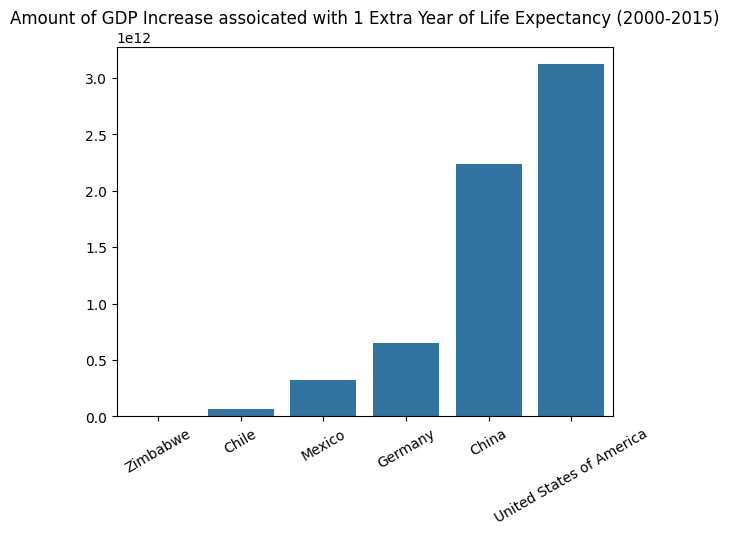

In [57]:
# Displaying the Amount of Increase in GDP Associated with 1 Additional Year of Life Expectancy
    # Zimbabwe and Chile have a small total increase in country GDP associated with an increased year Life Expectancy
    # USA has the highest country-level GDP increase associated with 1 year of life expectancy
    # NOTE: USA has a larger population than Zimbabwe and Chile
    # NOTE: GDP is an aggregate statistic for the entrie country, while Life Expectancy is per person
    # NOTE: A country with a lower total population may need a smaller increase in GDP to improve Life Expectancy per capita
sns.barplot(sorted_dict);
plt.title("Amount of GDP Increase assoicated with 1 Extra Year of Life Expectancy (2000-2015)");
plt.xticks(rotation=30);

## Zooming into the Second Half of Data (2008-2015)

In [48]:
country_slope_dict_08_15 = {}

for each_country in df.country.unique():
    # Calculate Rise
    max_gdp = df[(df.country == each_country) & (df.year > 2007)].gdp.max()
    min_gdp = df[(df.country == each_country) & (df.year > 2007)].gdp.min()
    change_in_gdp = max_gdp - min_gdp

    # Calculate Run
    max_life_exp = df[(df.country == each_country) & (df.year > 2007)].life_exp.max()
    min_life_exp = df[(df.country == each_country) & (df.year > 2007)].life_exp.min()
    change_in_life_exp = max_life_exp - min_life_exp

    # Calculate Rise over Run
    slope = round(change_in_gdp / change_in_life_exp)

    country_slope_dict_08_15[each_country] = slope
    print(f"{each_country}: {slope}")

# Order the Dictionary from Least to Greatest
sorted_dict_08_15 = dict(sorted(country_slope_dict_08_15.items(), key=lambda item: item[1]))

Chile: 75710714286
China: 4041556250000
Germany: 468181818182
Mexico: 366828181818
United States of America: 3363636363636
Zimbabwe: 951117201


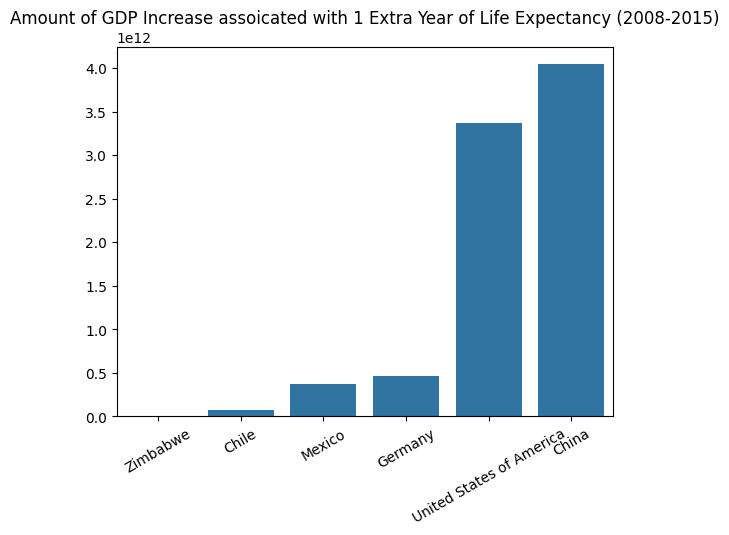

In [55]:
# Graph GDP association with Life Expectancy over Second Half of Data
    # China has surpassed USA in terms of how much GDP is associated with 
    # Perhaps this could be interpreted as China's GDP is increasing without much relative increase in Life Expectancy
sns.barplot(sorted_dict_08_15);
plt.title("Amount of GDP Increase assoicated with 1 Extra Year of Life Expectancy (2008-2015)");
plt.xticks(rotation=30);

## Comparison of Linear Relationship between GDP and Life Expectancy in USA & China

Note:
This slope represents the amount of GDP increase that corresponds to 1 additional year of Life Expectancy

Over Entire Period:
* USA: 3,120,000,000,000
* CHINA: 2,240,000,000,000

During Second Half Observed:
* USA: 3,363,000,000,000
* CHINA: 6,466,490,000,000

Conclusion:
* USA has a strong correlation between GDP and Life Expectancy
* China has been exhibited a higher correlation from 2008-2015

In [ ]:
df[(df.country == each_country)].gdp.max()

In [28]:
df[(df.country == "China")&(df.year > 2007)]

,country,year,life_exp,gdp
24,China,2008,74.5,4.598210e+12
25,China,2009,74.9,5.109950e+12
26,China,2010,75.0,6.100620e+12
27,China,2011,75.2,7.572550e+12
28,China,2012,75.4,8.560550e+12
29,China,2013,75.6,9.607220e+12
30,China,2014,75.8,1.048240e+13
31,China,2015,76.1,1.106470e+13


In [29]:
#change in China's GDP from 2008-2015
df[(df.country == "China")&(df.year > 2007)].gdp.max() - df[(df.country == "China")&(df.year > 2007)].gdp.min()

6466490000000.0

In [30]:
# Change in China's Life Expectancy from 2008-2015
df[(df.country == "China")&(df.year > 2007)].life_exp.max() - df[(df.country == "China")&(df.year > 2007)].life_exp.min()

1.5999999999999943

In [34]:
#Slope of China's curve from 2008-2015
china_slope_08 = 6466490000000.0 / 1.59999999999999

In [41]:
(df[(df.country == "China")].gdp.max() - df[(df.country == "China")].gdp.min()) / (df[(df.country == "China")].life_exp.max() - df[(df.country == "China")].life_exp.min())

2239397727272.7314

In [35]:
#USA

usa_gdp_delta = df[df.country=="United States of America"].gdp.max() - df[df.country=="United States of America"].gdp.min()
usa_life_exp_delta = df[df.country=="United States of America"].life_exp.max() - df[df.country=="United States of America"].life_exp.min()

usa_slope = usa_gdp_delta/usa_life_exp_delta

In [36]:
usa_slope

3120000000000.0

In [39]:
usa_gdp_delta_08 = df[(df.country=="United States of America") & (df.year > 2007)].gdp.max() - df[(df.country=="United States of America")& (df.year > 2007)].gdp.min()
usa_life_exp_delta_08 = df[(df.country=="United States of America") & (df.year > 2007)].life_exp.max() - df[(df.country=="United States of America") & (df.year > 2007)].life_exp.min()

usa_slope_08 = usa_gdp_delta_08/usa_life_exp_delta_08

In [40]:
usa_slope_08

3363636363636.381

## Comparison of Linear Relationship between GDP and Life Expectancy in USA & China

Note:
This slope represents the amount of GDP increase that corresponds to 1 additional year of Life Expectancy

Over Entire Period:
* USA: 3,120,000,000,000
* CHINA: 2,240,000,000,000

During Second Half Observed:
* USA: 3,363,000,000,000
* CHINA: 6,466,490,000,000

Conclusion:
* USA has a strong correlation between GDP and Life Expectancy
* China has been exhibited a higher correlation from 2008-2015


# 5) Change in Life Expectancy over the Sample Period

In [27]:
country_grouped_df = df.groupby("country").agg({"gdp":["max", "min"], "life_exp":["max", "min"]})

In [28]:
country_grouped_df

gdp               life_exp      
                                   max           min      max   min
country                                                            
Chile                     2.783840e+11  6.973681e+10     80.5  77.3
China                     1.106470e+13  1.211350e+12     76.1  71.7
Germany                   3.890610e+12  1.949950e+12     81.0  78.0
Mexico                    1.298460e+12  6.836480e+11     76.7  74.8
United States of America  1.810000e+13  1.030000e+13     79.3  76.8
Zimbabwe                  1.630467e+10  4.415703e+09     60.7  44.3

In [29]:
gdp_increase_by_country = country_grouped_df["gdp", "max"] - country_grouped_df["gdp", "min"]
gdp_increase_by_country

country
Chile                       2.086472e+11
China                       9.853350e+12
Germany                     1.940660e+12
Mexico                      6.148120e+11
United States of America    7.800000e+12
Zimbabwe                    1.188897e+10
dtype: float64

In [30]:
life_exp_increase_by_country = country_grouped_df["life_exp", "max"] - country_grouped_df["life_exp", "min"]
life_exp_increase_by_country

country
Chile                        3.2
China                        4.4
Germany                      3.0
Mexico                       1.9
United States of America     2.5
Zimbabwe                    16.4
dtype: float64

In [31]:
gdp_increase_by_country.index

Index(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'],
      dtype='object', name='country')

In [32]:
gdp_increase_by_country['Zimbabwe']

11888965007.0

In [33]:
round(gdp_increase_by_country['Zimbabwe'] / life_exp_increase_by_country['Zimbabwe'])

724936891

In [34]:
print("How much GDP needs to increase to increase Life Expectancy by 1 Year:")
for each_ in gdp_increase_by_country.index:
    print(f"{each_}: {round(gdp_increase_by_country[each_] / life_exp_increase_by_country[each_])}")
    #print(round(gdp_increase_by_country[each]) / (life_exp_increase_by_country[each]),2)


How much GDP needs to increase to increase Life Expectancy by 1 Year:
Chile: 65202246427
China: 2239397727273
Germany: 646886666667
Mexico: 323585263158
United States of America: 3120000000000
Zimbabwe: 724936891


In [35]:
countries = ["Chile", "China", "Germany", "Mexico", "USA", "Zimbabwe"]

In [36]:
countries_dict = {"Chile":65202246427, "China":2239397727273, "Germany":646886666667, "Mexico":323585263158, "USA":3120000000000, "Zimbabwe":724936891}
sorted_dict = dict(sorted(countries_dict.items(), key=lambda item: item[1]))

In [37]:
gdp_to_life_exp_ratio = [65202246427,2239397727273,646886666667,323585263158,3120000000000,724936891]

In [38]:
sorted_dict = {}
list_of_keys = []
for k,v in countries_dict:
    list_of_keys.append(v)


ValueError: too many values to unpack (expected 2)

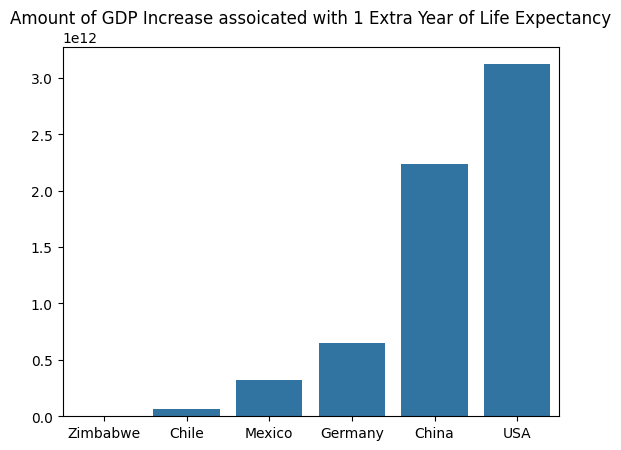

In [ ]:
sns.barplot(sorted_dict);
plt.title("Amount of GDP Increase assoicated with 1 Extra Year of Life Expectancy");


NOTE:

For Zimbabwe, becauase they have lower life expectancy you could say it is easier for them to increase life expectancy becuase they started lower, so they dont need as much GDP increase

However, for a country like Chile or Germany, they have achieved high life expectancy with less GDP than the USA

Perhaps population would be interesting assess as well

Could say that USA need more GDP to increase life expectancy

However, Germany has a higher per-capita GDP

## Population Density

### Plot GDP per capita VS life expectancy for 2015

Sctterplot for each country

In USA and China:

A large increase of GDP is needed to increase life expectancy by a year

In countries other than USA and China:

Less increase in GDP is needed to increase life expectancy 

In [ ]:
usa_pop_2015 = 320000000
chile_pop_2015 = 17900000
germany_pop_2015 = 81700000

In [ ]:
usa_gdp_2015 = float(df[(df.country == "United States of America") & (df.year == 2015)].gdp)
chile_gdp_2015 = float(df[(df.country == "Chile") & (df.year == 2015)].gdp)
germany_gdp_2015 = float(df[(df.country == "United States of America") & (df.year == 2015)].gdp)

/var/folders/75/8cznfb4d2j56mrdwqyh36s3w0000gn/T/ipykernel_7606/1342049826.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  usa_gdp_2015 = float(df[(df.country == "United States of America") & (df.year == 2015)].gdp)
/var/folders/75/8cznfb4d2j56mrdwqyh36s3w0000gn/T/ipykernel_7606/1342049826.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  chile_gdp_2015 = float(df[(df.country == "Chile") & (df.year == 2015)].gdp)
/var/folders/75/8cznfb4d2j56mrdwqyh36s3w0000gn/T/ipykernel_7606/1342049826.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  germany_gdp_2015 = float(df[(df.country == "United States of America") & (df.year == 2015)].gdp)


In [ ]:
usa_pop_2015

320000000

In [ ]:
usa_gdp_pop = usa_gdp_2015/usa_pop_2015
usa_gdp_pop

56562.5

In [ ]:
chile_gdp_pop = chile_gdp_2015/chile_pop_2015
chile_gdp_pop

13548.491620111732

In [ ]:
germany_gdp_pop = germany_gdp_2015/germany_pop_2015
germany_gdp_pop

221542.22766217872

In [ ]:
country_grouped_df_reset = df.groupby("country").agg({"gdp":["max", "min"], "life_exp":["max", "min"]}).reset_index()

In [ ]:
country_grouped_df["gdp", "min"]

In [ ]:
chile_gdp_2015 = float(df[(df.country == "Chile") & (df.year == 2015)].gdp)

/var/folders/75/8cznfb4d2j56mrdwqyh36s3w0000gn/T/ipykernel_7606/3320133417.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  chile_gdp_2015 = float(df[(df.country == "Chile") & (df.year == 2015)].gdp)


In [ ]:
df[(df.country == "Chile") & (df.year == 2015)].gdp / chile_pop_2015

/var/folders/75/8cznfb4d2j56mrdwqyh36s3w0000gn/T/ipykernel_7606/967221646.py:1: RuntimeWarning: divide by zero encountered in divide
  df[(df.country == "Chile") & (df.year == 2015)].gdp[15] / chile_pop_2015


array([1.42657647e+10, 2.69464444e+08,            inf])

In [ ]:
country_grouped_df

gdp               life_exp      
                                   max           min      max   min
country                                                            
Chile                     2.783840e+11  6.973681e+10     80.5  77.3
China                     1.106470e+13  1.211350e+12     76.1  71.7
Germany                   3.890610e+12  1.949950e+12     81.0  78.0
Mexico                    1.298460e+12  6.836480e+11     76.7  74.8
United States of America  1.810000e+13  1.030000e+13     79.3  76.8
Zimbabwe                  1.630467e+10  4.415703e+09     60.7  44.3

# 7) Conclusion

In general, GDP and life expectancy demonstrate a positive linear relationship.

The amount of GDP increase associated with 1 extra year of life expectancy varies per country. 
* For example in Zimbabwe, a relatively low increase in GDP has increased Life Expectancy by over 15 years in the small amount of time. THis could be due to the fact that as a developing country, small changes are made to increase life expectancy (perhaps more access to healthcare or better facilities). 
* However, in the United States, a developed country with already a relatively high life expectancy, a large increase in GDP is needed to increase Life Expectancy by an additional year.

Note, just because these two feautures are correlated, does not mean that one causes the other. 